# Implementation of huffman coding

* Firstly, build frequency dictionary or frequency table.
* Then, build priority queue(using minheap)
* Build Huffman tree by selecting two minimum nodes and merging them.
* Next assign codes to the characters by traversing the tree from root.
* Encode the input text with the created codes.
* If overall length of the final encoded bit streams is not the multiple of 8 then the add some padding to the text. When we store this stream of bits which is encoded text as binary file, it gets stored as bytes, so at the time the storing, we check whether the length is multiple of 8 or not and add padding accordingly. Ex- 14 bits- then add 2 bits and then store. 
* Store the padding information at the start of overall encoded bit stream.
* Write the result to an output binary file. 

# Implementation of RLE (run length encoding)

* In this algorithm, it replaces the characters in the data by no of times it is occurring. Finally, this stores only the single value of the character and its count.  
* Here, the main idea is to run the linear scan and get the count (no of occurrences of that character) in the given input text.


In [1]:
import ipywidgets as widgets

file_upload = widgets.FileUpload(accept='.txt',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
                                    multiple=False  # True to accept multiple files upload else False
                                )

display(file_upload)

FileUpload(value={}, accept='.txt', description='Upload')

In [2]:
text_in_file=file_upload.value
print(text_in_file)

{'d.txt': {'metadata': {'name': 'd.txt', 'type': 'text/plain', 'size': 1052352, 'lastModified': 1637692139615}, 'content': b'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque nisl eros, \r\npulvinar facilisis justo mollis, auctor consequat urna. Morbi a bibendum metus. \r\nDonec scelerisque sollicitudin enim eu venenatis. Duis tincidunt laoreet ex, \r\nin pretium orci vestibulum eget. Class aptent taciti sociosqu ad litora torquent\r\nper conubia nostra, per inceptos himenaeos. Duis pharetra luctus lacus ut \r\nvestibulum. Maecenas ipsum lacus, lacinia quis posuere ut, pulvinar vitae dolor.\r\nInteger eu nibh at nisi ullamcorper sagittis id vel leo. Integer feugiat \r\nfaucibus libero, at maximus nisl suscipit posuere. Morbi nec enim nunc. \r\nPhasellus bibendum turpis ut ipsum egestas, sed sollicitudin elit convallis. \r\nCras pharetra mi tristique sapien vestibulum lobortis. Nam eget bibendum metus, \r\nnon dictum mauris. Nulla at tellus sagittis, viverra est a, bibend

Compressed
size of the compressed file which uses  huffman coding 
580215
size of the compressed file which uses  rle algorithm 
2119574
Time taken by the huffman encoding and rle algorithms is:
[3.142120599746704, 2.14715838432312]


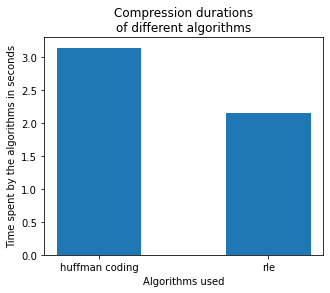

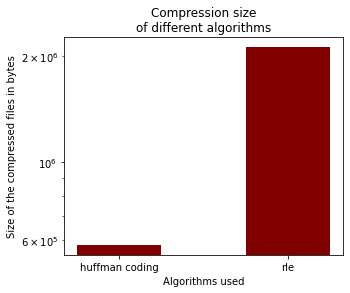

In [3]:
import heapq
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt


class TextCompression:
    def __init__(self, txt):
        self.txt = txt
        self.heap = []
        self.codes = {}
        self.reverse_mapping = {}

    class HeapNode:
        def __init__(self, char, freq):
            self.char = char
            self.freq = freq
            self.left = None
            self.right = None

# defining the comparators less_than and equals, overwriting  the inbuilt functions.
        def __lt__(self, other):
            return self.freq < other.freq

        def __eq__(self, other):
            if(other == None):
                return False
            if(not isinstance(other, HeapNode)):
                return False
            return self.freq == other.freq

# functions for compression:
#this function is to create the frequency table.
    def frequency_dict(self, text):
        frequency = {}
        for character in text:
            if not character in frequency:
                frequency[character] = 0
            frequency[character] += 1
        return frequency

#This is used to create the priority queue and store it.
    def making_heap(self, frequency):
        for key in frequency:
            node = self.HeapNode(key, frequency[key])
            heapq.heappush(self.heap, node)
# we are using inbuilt function for heap and using it to pushthe node to the heap.

#this is used to build the huffman tree.
    def merging_nodes(self):
        while(len(self.heap)>1): #We  will merge the nodes only if there are more one node in the heap.
            node1 = heapq.heappop(self.heap) #1st minimum node
            node2 = heapq.heappop(self.heap) #2nd minimum node

            merged = self.HeapNode(None, node1.freq + node2.freq)
            merged.left = node1
            merged.right = node2

            heapq.heappush(self.heap, merged)


    def make_codes_helper(self, root, current_code):
        if(root == None):
            return

        if(root.char != None):
            self.codes[root.char] = current_code
            self.reverse_mapping[current_code] = root.char
            return

        self.make_codes_helper(root.left, current_code + "0")
        self.make_codes_helper(root.right, current_code + "1")

#This is used to make the codes for the characters and save.
    def making_codes(self):
        root = heapq.heappop(self.heap)
        current_code = ""
        self.make_codes_helper(root, current_code)

# this is to replace the characters with their code.
    def get_encoded_txt(self, text):
        encoded_text = ""
        for character in text:
            encoded_text += self.codes[character]
        return encoded_text

#this is used to pad the encoded text or add padding to the encoded text
    def pad_encoded_txt(self, encoded_text):
        extra_padding = 8 - len(encoded_text) % 8
        #Adding random bits of 
        for i in range(extra_padding):
            encoded_text += "0"

        padded_info = "{0:08b}".format(extra_padding) 
#This is formating function used to format the extrapadding no to binary representation and in 8 bits.
        encoded_text = padded_info + encoded_text
        return encoded_text

#In order to get the output binary file, we need convert bits into bytes and then write to the output file.return byte array.
    def get_bytes_array(self, padded_encoded_text):
        if(len(padded_encoded_text) % 8 != 0):
            print("Encoded text not padded properly")
            exit(0)

        b = bytearray()
        for i in range(0, len(padded_encoded_text), 8):
            byte = padded_encoded_text[i:i+8]
            b.append(int(byte, 2)) #converting the byte string to byte, where base value is 2.
        return b

#Compressing the file using the huffman coding algorithm
    def compress(self):
       
        output_path =  "C:/data/5-1/dmm/dsa/new.bin" #specify the path where the outfile needs to be stored.

        with open(output_path, 'wb') as output:
            text = self.txt
            text = str(text).rstrip()

            frequency = self.frequency_dict(text)
            self.making_heap(frequency)
            self.merging_nodes()
            self.making_codes()

            encoded_text = self.get_encoded_txt(text)
            padded_encoded_text = self.pad_encoded_txt(encoded_text)

            b = self.get_bytes_array(padded_encoded_text)
            output.write(bytes(b)) #convert byte array into bytes  andwrite it to the output file.
        size=os.path.getsize(output_path)
        print("Compressed")
        return size

#Compressing the file using RLE algorithm.
    def encodeRle(self):
        
        output_path =  "C:/data/5-1/dmm/dsa/new2.bin"  #specify the path where the outfile needs to be stored.

        with  open(output_path, 'wb') as output:
            text = self.txt
            text = str(text).rstrip()
            encoding = "" #  This stores the output string

            i = 0
            while i < len(text):
                # count the no of occurrences of character
                count = 1

                while i + 1 < len(text) and text[i] == text[i + 1]:
                    count = count + 1
                    i = i + 1

                # append the current character and its count to the result
                encoding += str(count) + text[i]
                i = i + 1

            res = bytes(encoding, 'utf-8') #converting the string to bytes and writing it to the output file.
            output.write(res)
        size=os.path.getsize(output_path)
        
        return size


    


ti=list() #for time
si=list() # for size of compressed file
huff=   TextCompression(text_in_file) 
start_t= time.time()
size=huff.compress()
end_t= time.time()
total_time=end_t - start_t
ti.append(total_time)
si.append(size)

start_t1= time.time()
size1=huff.encodeRle()
end_t1= time.time()
total_time1=end_t1 - start_t1
ti.append(total_time1)
si.append(size1)

print("size of the compressed file which uses  huffman coding ")
print(size)
print("size of the compressed file which uses  rle algorithm ")
print(size1)
print("Time taken by the huffman encoding and rle algorithms is:")
print(ti)
N=2
ind = np.arange(N)
width = 0.5

fig=plt.figure(figsize= (5,4))
plt.bar(ind, ti, width)
plt.xlabel("Algorithms used")
plt.ylabel('Time spent by the algorithms in seconds')
plt.xticks(ind, ('huffman coding', 'rle'))
plt.title('Compression durations\nof different algorithms')
plt.show()


fig2=plt.figure(figsize= (5,4))
plt.bar(ind, si, width,color ='maroon', log=True)
plt.xlabel("Algorithms used")
plt.ylabel('Size of the compressed files in bytes')
plt.xticks(ind, ('huffman coding', 'rle'))
plt.title('Compression size\nof different algorithms')
plt.show()



RLE has time complexity of O(n)
Huffman coding has time complexity O(nlogn)

It is recommended to use huffmna coding for large amounts of data and rle for small data.(reference https://core.ac.uk/download/pdf/228547034.pdf)
Rle can be mostly used for genetic data or dna kind of data.

If the time complexity of the Huffman coding is reduced then it will be the best algorithm to use in all cases other than Rle algorithm. But, in order to reduce the time complexity of the Huffman, the frequency dictionary which is created must be in a sorted manner, so that any sorting algorithm will not be used.

